# Utilization of the voxel fields class

Import the voxelsss library together with numpy

In [1]:
import voxelsss as vox
import numpy as np

Create a voxel fields object and explore some of its properties

In [2]:
Nx, Ny, Nz = [20, 10, 5]
vf = vox.VoxelFields(Nx, Ny, Nz, domain_size=(Nx, Ny, Nz))
print("VoxelFields object is now defined as")
print(f" - grid with {vf.Nx} x {vf.Ny} x {vf.Nz} points,")
print(f" - defined with {vf.convention} grid convention.")
print(f" - Physical domain size {vf.domain_size}")
print(f" - and the resulting grid spacing {vf.spacing}")
print(f" - First grid point (origin) is located at {vf.origin}")
print(f" - Float precision of data is set to {vf.precision}")

VoxelFields object is now defined as
 - grid with 20 x 10 x 5 points,
 - defined with cell_center grid convention.
 - Physical domain size (20, 10, 5)
 - and the resulting grid spacing (1.0, 1.0, 1.0)
 - First grid point (origin) is located at (0.5, 0.5, 0.5)
 - Float precision of data is set to <class 'numpy.float32'>


The ``cell_center`` grid convention assumes that field values 'live' at the center of each voxel (denoted by red dots in the figure below). Fluxes between two voxels are computed at so-called staggered field positions, i.e.
- x fluxes live on sides staggered to the right (blue)
- y fluxes live staggered to the top (green)

<img src="https://i.sstatic.net/i4jJC.png" width="250px">

Initialize field with random noise

In [3]:
noise = 0.5 + 0.1*np.random.rand(Nx, Ny, Nz)
noise[0,:,:] = 0.1
vf.add_field("c", noise)

Explore plotting utilities of voxelFields class

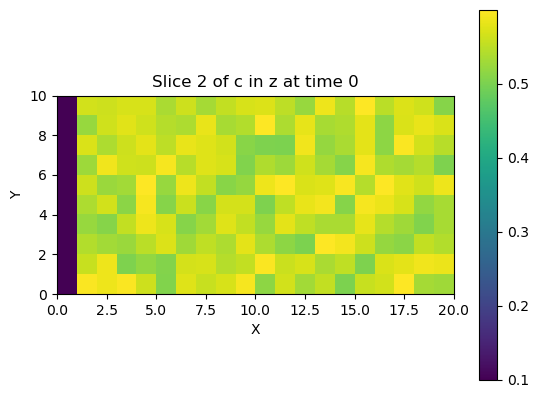

In [4]:
%matplotlib inline
vf.plot_slice('c', 2, direction='z', time='0')

Interactive plotting to scroll through slices

In [5]:
# %matplotlib widget
# vf.plot_field_interactive("c", direction='x', colormap='turbo')

We can now plug the initial concentration field into the Periodic Cahn-Hilliard solver

In [6]:
end_time = 100

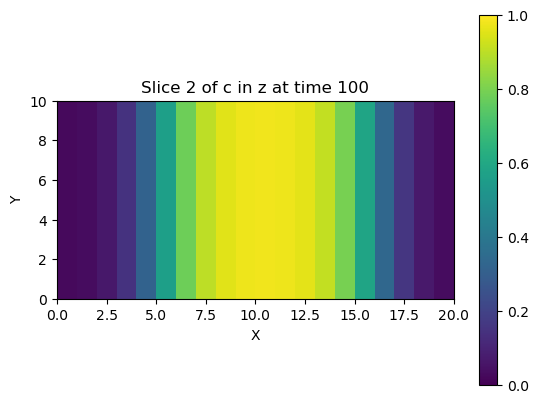

Wall time: 1.3042 s after 100 iterations (0.013 s/iter)
GPU-RAM currently allocated: 0.01 MB (260.05 MB reserved)
GPU-RAM maximally allocated: 0.06 MB (260.05 MB reserved)
GPU-RAM nvidia-smi current:  511 MB (511 MB max)


In [9]:
%matplotlib inline
vf.add_field("c", noise)

dt = 1
vox.run_cahn_hilliard_solver( \
        vf, 'c', 'torch', device='cuda', \
        time_increment=dt, frames=10, max_iters=int(end_time/dt), \
        verbose='plot', vtk_out=False, plot_bounds=(0,1))

Export the final concentration field after solve to vtk

In [8]:
vf.export_to_vtk(filename='test.vtk')

## Staggered grid positions

For some FFT solvers with mixed boundary conditions it is preferable to work with a staggered grid i.e. the node positions are shifted in a specific direction. To compute tortuosity, we utilize Dirichlet BCs in x-direction while the y- and z-direction are governed by zero-flux or periodic boundary conditions.

The VoxelFields object has the grid convention as an attribute which can be set to ``staggered_x``. Note that there are now nodes located at the left and right boundary i.e. the grid spacing equals ``dx = Lx/(Nx-1)`` as exemplified below.

The field values are now stored at the blue positions.

<img src="https://i.sstatic.net/i4jJC.png" width="250px">

In [9]:
Nx, Ny, Nz = [21, 10, 5]
vf = vox.VoxelFields(Nx, Ny, Nz, domain_size=(Nx-1, Ny, Nz), convention='staggered_x')
print("VoxelFields object is now defined as")
print(f" - grid with {vf.Nx} x {vf.Ny} x {vf.Nz} points,")
print(f" - defined with {vf.convention} grid convention.")
print(f" - Physical domain size {vf.domain_size}")
print(f" - and the resulting grid spacing {vf.spacing}")
print(f" - First grid point (origin) is located at {vf.origin}")
print(f" - Float precision of data is set to {vf.precision}")

VoxelFields object is now defined as
 - grid with 21 x 10 x 5 points,
 - defined with staggered_x grid convention.
 - Physical domain size (20, 10, 5)
 - and the resulting grid spacing (1.0, 1.0, 1.0)
 - First grid point (origin) is located at (0, 0.5, 0.5)
 - Float precision of data is set to <class 'numpy.float32'>


As this staggered grid positions are rather unusual, there is no 100% consistent way to visualize these fields. In a general sense, our data is still zonal data and will therefore be visualized with ``imshow`` in python and be exported using ``cell_data`` for the ``.vtk`` format. However, to highlight the difference, the origin is now shifted such that the first datapoints correlate with x=0 and the last with x=Lx.

In [10]:
noise = 0.5 + 0.1*np.random.rand(Nx, Ny, Nz)
noise[0,:,:] = 0.1
vf.add_field("c", noise)

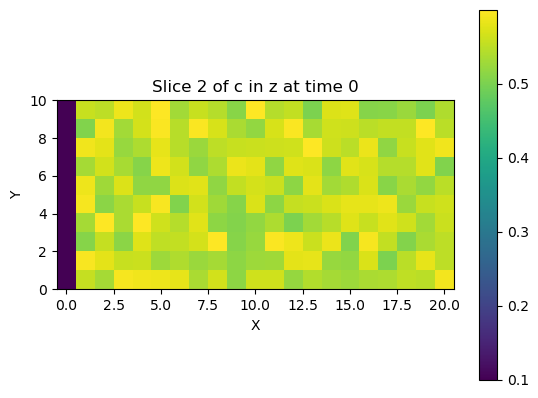

In [11]:
%matplotlib inline
vf.plot_slice('c', 2, direction='z', time='0')